<a href="https://colab.research.google.com/github/JoDeMiro/Micado-Research/blob/main/Estimation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bevezető

Fuzzy, Linreg, Polynomial linreg, Neural Net

Az alapötletet Kutor tanárúr adta https://youtu.be/Fo_HFlYMnRw?t=4612

Mi adta az ötletet:

A tanárúr azt mondja, hogy a fuzzy rendszer tulajdonképpen nem más mint a bementi változók és a kimenet közötti nem lieáris átmenet, és a tagsági függvények megfelelő beállításait kell megtalálni.

A tanítás itt is úgy zajlik, hogy van egy ismert kimenetünk, és vannak bemeneti változóink. Az átviteli függvényeket úgy akarjuk megkonstruálni, hogy a kimeneti változó és a fuzzy rendszer álltal adott kimenet közötti eltérés a legkissebb legyen.

Ez innentől fogva egy felügyelt tanulási probléma.

A felvetésem pedig az, hogy ha így van akkor miért a sok átmeneti függvény és azok paramétereinek keresése valamilyen brute force vagy evolúciós algoritmussal, amikor ezt akár lineáris regresszióval is megoldhatjuk, hogyha a magasabb rendű polinomokat is beleszámítjuk, akár neurális hálóval.

In [234]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


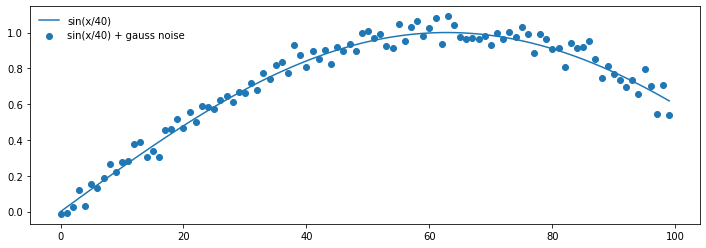

In [235]:
x = np.arange(0, 100, 1)

y = np.sin(x/40)

s = y + np.random.normal(0, 0.05, x.size)

plt.figure(figsize=(12, 4))
plt.plot(x, y, label = 'sin(x/40)')
plt.scatter(x, s, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

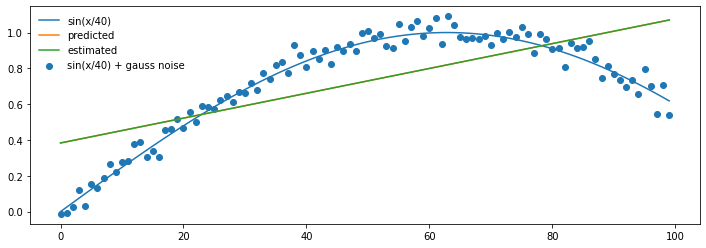

In [236]:
regression_1 = LinearRegression()

regression_1.fit(x.reshape(-1,1), s)

predicted = regression_1.predict(x.reshape(-1,1))

estimated = regression_1.intercept_ + regression_1.coef_[0] * x

plt.figure(figsize=(12, 4))
plt.plot(x, y, label = 'sin(x/40)')
plt.plot(x, predicted, label = 'predicted')
plt.plot(x, estimated, label = 'estimated')
plt.scatter(x, s, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

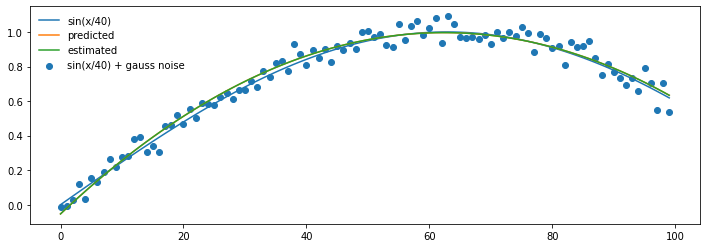

In [237]:

X = np.array([_x, _x**2]).T

regression_2 = LinearRegression()

regression_2.fit(X, s)

predicted = regression_2.predict(X)

estimated = regression_2.intercept_ + regression_2.coef_[0] * _x + regression_2.coef_[1] * x**2

estimated = regression_2.intercept_ + np.sum(regression_2.coef_ * X, axis=1)

plt.figure(figsize=(12, 4))
plt.plot(x, y, label = 'sin(x/40)')
plt.plot(x, predicted, label = 'predicted')
plt.plot(x, estimated, label = 'estimated')
plt.scatter(x, s, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

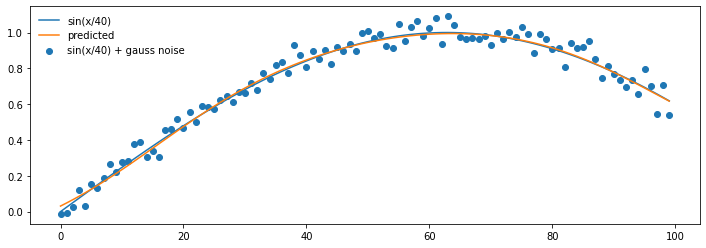

In [238]:
X = x.reshape(-1, 1)

X = X/X.max()

mlp = MLPRegressor(hidden_layer_sizes = (3, 3),
                   shuffle=False,
                   tol = 0.01,                                    # Ez a két paraméter különösen veszélyes, mert idő előtt leállítják a tanulást
                   momentum = 0.1,
                   nesterovs_momentum = True,
                   n_iter_no_change = 1000,                       # Ez a két paraméter különösen veszélyes, mert idő előtt leállítják a tanulást
                   # max_fun = 1000,
                   activation = 'logistic',
                   solver = 'adam',
                   random_state = 1,
                   learning_rate_init = 0.3,
                   max_iter = 2000000)


mlp.fit(X, y)

predicted = mlp.predict(X)

plt.figure(figsize=(12, 4))
plt.plot(x, y, label = 'sin(x/40)')
plt.plot(x, predicted, label = 'predicted')
plt.scatter(x, s, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

In [239]:
# ugyan ennek megcsinálni a két dimenziós változatát is, ahol x1, x2 van és y (a példa pedig az amit a Micado Scale researchben csináltam cosinus sinusra)

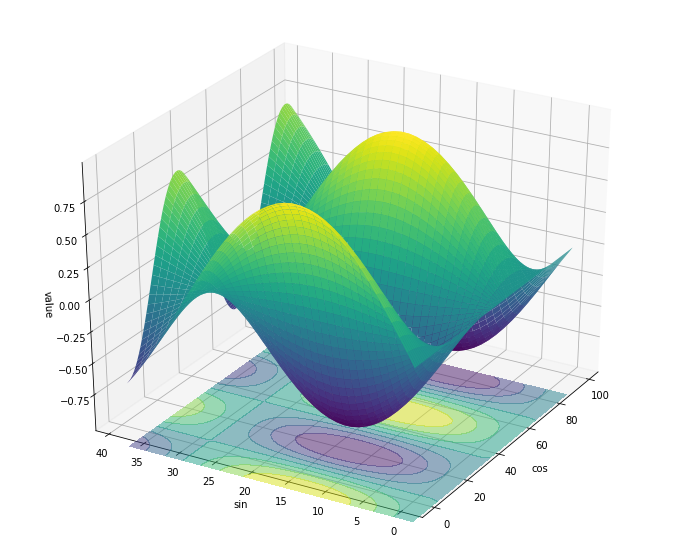

In [241]:
# Fun(i)

x1 = 40
x2 = 100

x1_space = np.linspace(0, x1-1, x1)
x2_space = np.linspace(0, x2-1, x2)

x1, x2 = np.meshgrid(x2_space, x1_space)
z = np.zeros_like(x1)

for i in range(len(x1_space)):
  i = int(i)
  for j in range(len(x2_space)):
    j = int(j)
    z[i, j] = np.sin(i/10)*np.cos(j/10)

# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('cos')
ax.set_ylabel('sin')
ax.set_zlabel('value')
surf = ax.plot_surface(x1, x2, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x1, x2, z, zdir = 'z', offset = -1.2, cmap = 'viridis', alpha = 0.5)
ax.view_init(30, 210)

In [ ]:
# Ez mind szép és jó, de ezeket most három változóba kéne rendezni x1, x2, y

In [242]:
print(x1.shape)
print(x2.shape)
print(z.shape)

(40, 100)
(40, 100)
(40, 100)


In [243]:
x1[:3,:4]

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

In [244]:
x2[:3,:4]

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.]])

In [245]:
z[:3,:4]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.09983342, 0.09933467, 0.0978434 , 0.09537451],
       [0.19866933, 0.19767681, 0.19470917, 0.18979606]])

In [246]:

_x1 = x1.ravel()
_x2 = x2.ravel()
_z  = z.ravel()

In [333]:

X = np.array([_x1, _x2]).T

regression_3 = LinearRegression()

regression_3.fit(X, _z)

predicted = regression_3.predict(X)

r2 = r2_score(_z, predicted)

print('r2 = {:.2f}'.format(r2))


r2 = 0.02


In [334]:
# a predicted változót vissza kell alakítani mátrix formába

predicted_z = predicted.reshape(z.shape[0], z.shape[1])


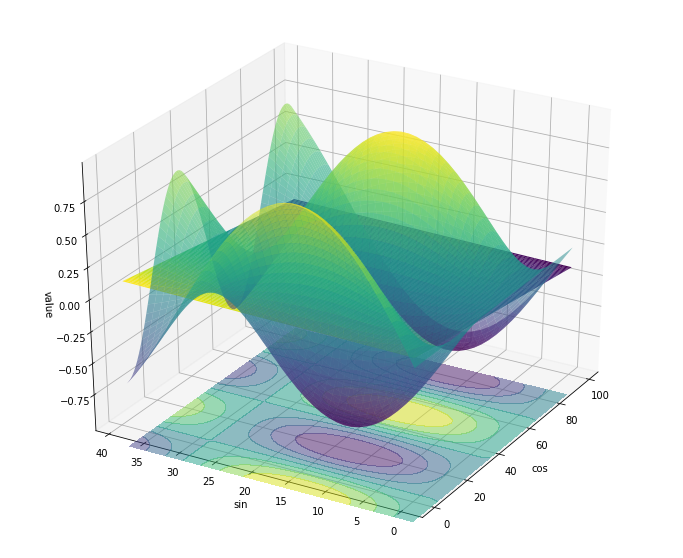

In [335]:
# 3D plot

def Plot4D(x1, x2, z, z_predicted):
  fig = plt.figure(figsize=(12, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('cos')
  ax.set_ylabel('sin')
  ax.set_zlabel('value')
  surf = ax.plot_surface(x1, x2, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True, alpha = 0.59)
  surf = ax.plot_surface(x1, x2, z_predicted, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
  cset = ax.contourf(x1, x2, z, zdir = 'z', offset = -1.2, cmap = 'viridis', alpha = 0.5)
  ax.view_init(30, 210)

Plot4D(x1, x2, z, predicted_z)

r2 = 0.03


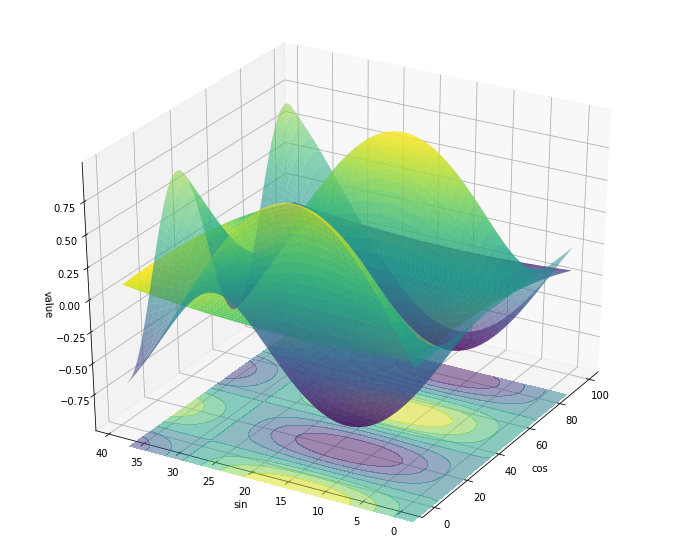

In [336]:

X = np.array([_x1, _x2, _x1**2, _x2**2]).T

regression_4 = LinearRegression()

regression_4.fit(X, _z)

predicted = regression_4.predict(X)

predicted_z = predicted.reshape(z.shape[0], z.shape[1])

r2 = r2_score(_z, predicted)

print('r2 = {:.2f}'.format(r2))

Plot4D(x1, x2, z, predicted_z)


r2 = 0.30


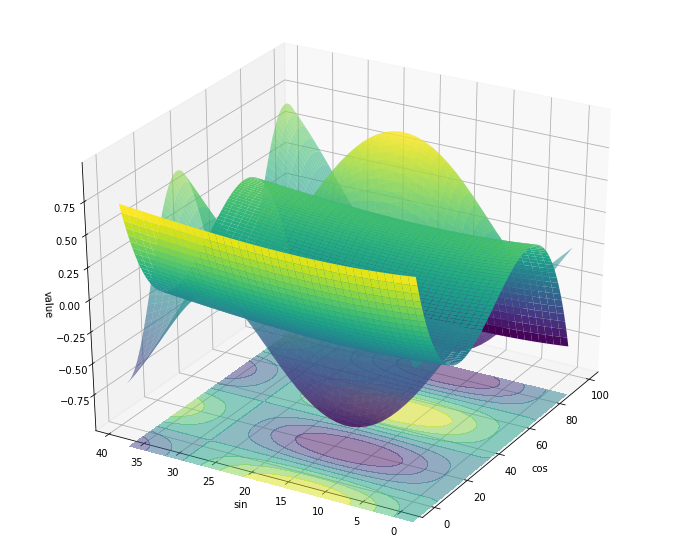

In [337]:

X = np.array([_x1, _x2, _x1**2, _x2**2, _x1**3, _x2**3]).T

regression_4 = LinearRegression()

regression_4.fit(X, _z)

predicted = regression_4.predict(X)

predicted_z = predicted.reshape(z.shape[0], z.shape[1])

r2 = r2_score(_z, predicted)

print('r2 = {:.2f}'.format(r2))

Plot4D(x1, x2, z, predicted_z)


r2 = 0.43


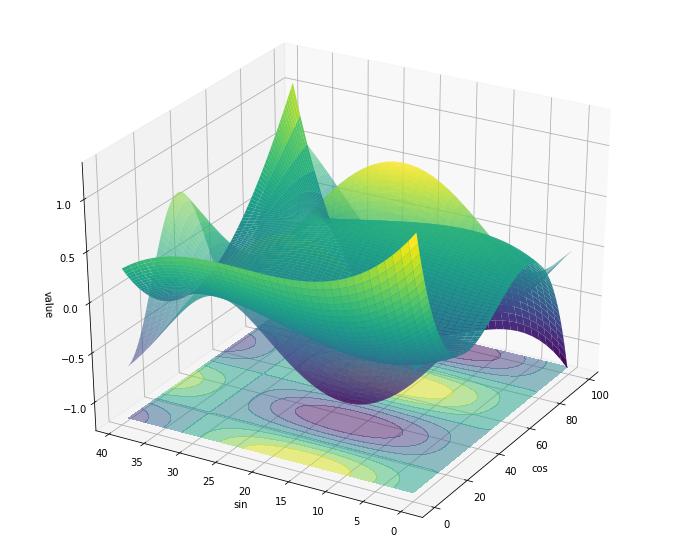

In [338]:

X = np.array([_x1, _x2, _x1 * _x2,  _x1**2, _x2**2, _x1**2 * _x2**2, _x1**3, _x2**3, _x1**3 * _x2**3]).T

regression_4 = LinearRegression()

regression_4.fit(X, _z)

predicted = regression_4.predict(X)

predicted_z = predicted.reshape(z.shape[0], z.shape[1])

r2 = r2_score(_z, predicted)

print('r2 = {:.2f}'.format(r2))

Plot4D(x1, x2, z, predicted_z)


r2 = 0.59


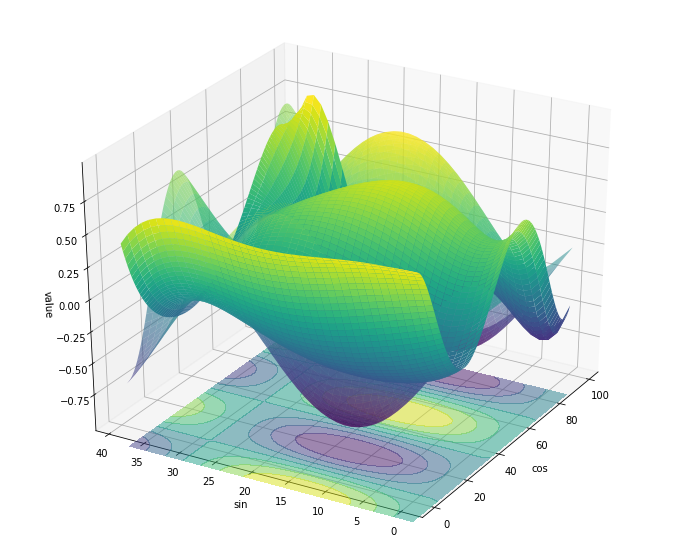

In [339]:

X = np.array([_x1, _x2, _x1 * _x2,  _x1**2, _x2**2, _x1**2 * _x2**2, _x1**3, _x2**3, _x1**3 * _x2**3, _x1**4, _x2**4, _x1**4 * _x2**4, _x1**5, _x2**5, _x1**5 * _x2**5]).T

regression_4 = LinearRegression()

regression_4.fit(X, _z)

predicted = regression_4.predict(X)

predicted_z = predicted.reshape(z.shape[0], z.shape[1])

r2 = r2_score(_z, predicted)

print('r2 = {:.2f}'.format(r2))

Plot4D(x1, x2, z, predicted_z)


r2 = 0.99


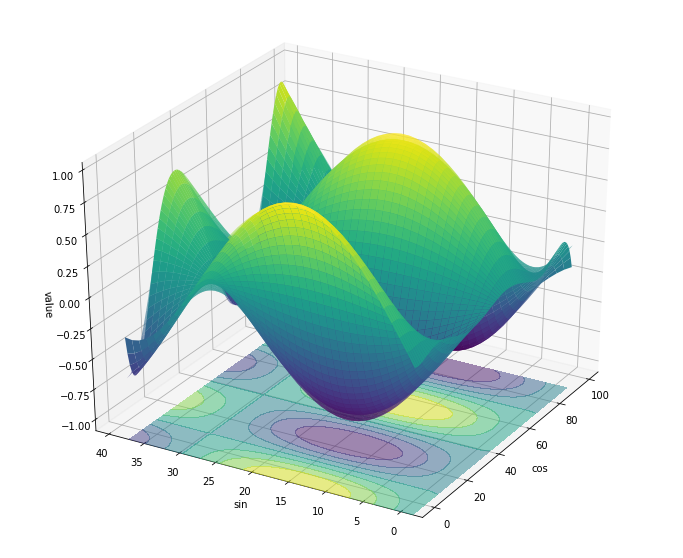

In [343]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X = np.array([_x1, _x2]).T

polynomial_features = PolynomialFeatures(degree = 7, include_bias = True)

X_p = polynomial_features.fit_transform(X)

regression_5 = LinearRegression()

regression_5.fit(X_p, _z)

predicted = regression_5.predict(X_p)

predicted_z = predicted.reshape(z.shape[0], z.shape[1])

r2 = r2_score(_z, predicted)

print('r2 = {:.2f}'.format(r2))

Plot4D(x1, x2, z, predicted_z)

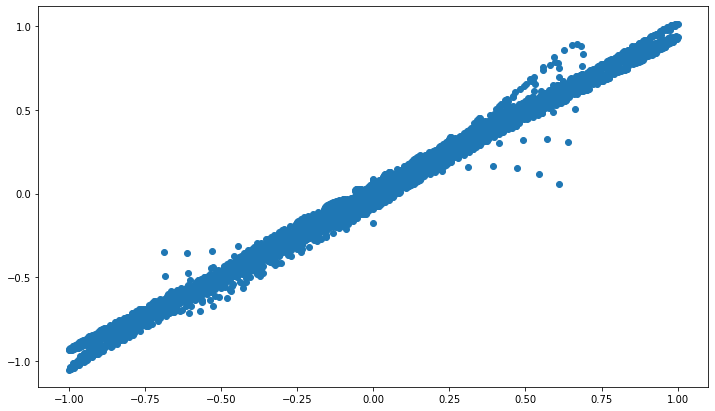

In [342]:
plt.figure(figsize=(12,7))
plt.scatter(z, predicted_z)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


r2 = 0.96


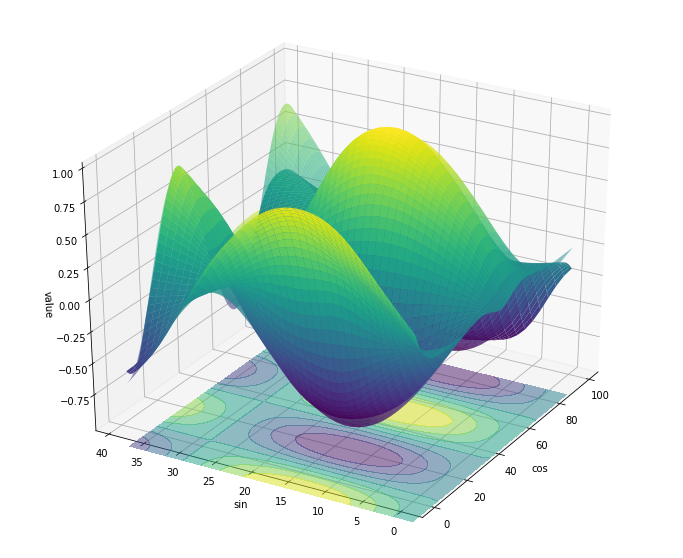

In [388]:
X = np.array([_x1, _x2]).T

# X = X/X.max()

mlp = MLPRegressor(hidden_layer_sizes = (10,3),
                   shuffle=True,
                   tol = 0.01,                                    # Ez a két paraméter különösen veszélyes, mert idő előtt leállítják a tanulást
                   momentum = 0.1,
                   nesterovs_momentum = True,
                   n_iter_no_change = 1000,                       # Ez a két paraméter különösen veszélyes, mert idő előtt leállítják a tanulást
                   # max_fun = 1000,
                   activation = 'logistic',
                   solver = 'adam',
                   random_state = 1,
                   learning_rate_init = 0.03,
                   max_iter = 400)


mlp.fit(X, _z)

predicted = mlp.predict(X)

predicted_z = predicted.reshape(z.shape[0], z.shape[1])

r2 = r2_score(_z, predicted)

print('r2 = {:.2f}'.format(r2))

Plot4D(x1, x2, z, predicted_z)

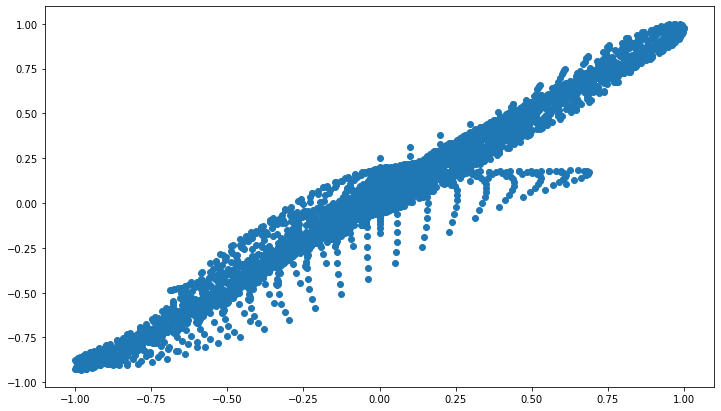

In [389]:
plt.figure(figsize=(12,7))
plt.scatter(z, predicted_z)
plt.show()